# Unstructured Data Analytics HW1

Name: Mingwei Gao

Andrew ID: mingweig

Reminder: you should not be sharing code.

### Instructions
1. Fill in your name and Andrew ID above.
2. Fill in the code/text blocks to answer each question.
3. Do *not* change any of the existing code provided.
4. Run the entire notebook *before* submitting it on Canvas to make sure that the code actually runs without errors. (**Important**: Any code cells that you have entered code for but did not actually execute will be disregarded, so please be sure to actually run your code first and make sure it runs without errors! We may re-run a subset of your code for grading purposes).
5. Be careful about where you save data for use with this Jupyter notebook (more details on this later).
6. You are encouraged to seek assistance from ChatGPT in developing your code.

In [1]:
import os
import spacy
import matplotlib.pyplot as plt

from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import math
from tqdm.notebook import tqdm
from google.colab import files

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Data Preparation

What we look at is a dataset for binary sentiment classification collected from [IMDb Movie Reviews](https://ai.stanford.edu/~amaas/data/sentiment/). It provides a subset of highly polar movie reviews along with their associated binary sentiment polarity labels. There are two top-level directories [pos/, neg/] directories for the reviews with binary labels positive and negative. Within these directories, reviews are stored in text files named following the
convention [[id]_[rating].txt] where [id] is a unique id and [rating] is
the star rating for that review on a 1-10 scale. For example, the file
[test/pos/200_8.txt] is the text for a positive-labeled test set
example with unique id 200 and star rating 8/10 from IMDb.

Here we prepare the original data set and a small subset of the same data. To earn full credit, your code must be executed on the entire data set. The smaller data subset is provided to assist you in testing and debugging your code.

Note: Please place the data in the same location as the code. When grading your homework, we will put your Jupyter notebook file and the dataset in the same folder, and run your code. **You will not receive points for this problem if your code fails to load the data.**

Hint: To list all file names that match a certain pattern, you can use the `glob` package. Here's an example usage:

```python
import glob
print(glob.glob('*.txt'))
```

In [2]:
# Load data from local file
# Select the zip file and upload it to the root dirctory on Colab.
# uploaded = files.upload()
# Unzip the uploaded file
!unzip "/content/drive/MyDrive/UDA/HW1/imdb-data.zip" -d "./"
# !unzip "/content/drive/MyDrive/UDA/HW1/imdb-data-subset.zip" -d "./"

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: ./neg/11198_3.txt       
  inflating: ./__MACOSX/neg/._11198_3.txt  
  inflating: ./neg/9819_4.txt        
  inflating: ./__MACOSX/neg/._9819_4.txt  
  inflating: ./neg/7725_3.txt        
  inflating: ./__MACOSX/neg/._7725_3.txt  
  inflating: ./neg/8325_2.txt        
  inflating: ./__MACOSX/neg/._8325_2.txt  
  inflating: ./neg/12464_1.txt       
  inflating: ./__MACOSX/neg/._12464_1.txt  
  inflating: ./neg/3318_1.txt        
  inflating: ./__MACOSX/neg/._3318_1.txt  
  inflating: ./neg/10712_1.txt       
  inflating: ./__MACOSX/neg/._10712_1.txt  
  inflating: ./neg/1372_4.txt        
  inflating: ./__MACOSX/neg/._1372_4.txt  
  inflating: ./neg/11549_3.txt       
  inflating: ./__MACOSX/neg/._11549_3.txt  
  inflating: ./neg/5453_3.txt        
  inflating: ./__MACOSX/neg/._5453_3.txt  
  inflating: ./neg/3729_4.txt        
  inflating: ./__MACOSX/neg/._3729_4.txt  
  inflating: ./neg/12349_1.txt       
  inflating: ./__MACOSX/neg/._12349_1.tx

### **Part 1 (80 points)**: Basic Text Analysis

This part helps you familiarize with the basic operations for text data.

##### Read Text Files

**Part 1.1 (10 points)**: Write a loop that iterates the first 5 reviews in the folder "pos"; for each review, print out its corresponding file name and content.

Each line of your output should look like (although there should be 5 reviews rather than 1 as shown below; also, the ordering of the reviews might be different on your machine):

```
4_4.txt This fanciful horror flick has Vincent Price playing a mad magician that realizes his vocational talents have been sold to another. He devise ways of avenging all those that have wronged him. His master scheme seems to back fire on him.<br /><br />Price is a little below par compared to his masterpieces, but is still the only reason to watch this thriller. Supporting cast includes Patrick O'Neal, Mary Murphy, Eva Gabor and Jay Novello.<br /><br />
```

> Note please do **not** print out the contents of all reviews since doing so will result in a Jupyter notebook file that is massive.

In [4]:
# Write your code here
pos_folder_path = '/content/pos'

files = os.listdir(pos_folder_path)

for file in files[:5]:
    file_path = os.path.join(pos_folder_path, file)
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
    print(f"{file} {content}\n")

3563_8.txt A gang of bandits lead by the shrewd, rugged, ruthless Monetero (a perfectly imposing performance by Gilbert Roland) steals $300,000 worth of gold coins during a daring train robbery. But untrustworthy member Bahunda (an amusing turn by Jose Torres) makes off with the coins and hides them. Unfortunately, Bahunda gets killed before he can tell Monetero where he stashed the booty. So Monetero has to join forces with cunning, cocky, enigmatic bounty hunter the Stranger (smoothly played by the handsome George Hilton) and cagey, corrupt banker Clayton (a delightfully weaselly portrayal by 50's teen idol Eddie "Kookie" Burns) to find the coins. Skillfully directed by Enzo G. Castellari, with a clever, complex and twist-laden script by Castellari, Tito Carpi, and Giovanni Simonelli, a playfully amoral and nihilistic tone (everyone keeps double and triple crossing each other with happily greedy abandon), a twangy, flavorsome, spirited score by Alessandro Alessandroni and Francesco D

##### **Part 1.2 (15 points)**: Histogram Analysis

    1. Modify the code above so that it reads all the reviews from both folders ("pos" and "neg").

    2. You need to use spaCy to tokenize the raw data and use `len()` to count the number of characters in the content of each file.

    3. Count the number of tokens and the number of characters in each text file and generate histograms to compare the token counts in the "pos" and "neg" reviews. Note it may take a while (10-20 minutes, depending on your computational resources) to process all reviews in both folders.

    4. Perform a basic analysis based on the histogram plots, and provide a textual summary of your observations. Describe what insights you can learn from the results and discuss the implications of these findings.

> Note that for this problem, you don't actually need `spaCy`'s named entity recognition or grammatical parsing. Turning these elements off when you instantiate the `nlp` object can substantially speed up your code. To make sure these are off when instantiating the `nlp` object, call:

```python
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])
```

In [5]:
# Write your code here (10 points)
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

folders = ['/content/pos', '/content/neg']
token_counts = {"pos": [], "neg": []}
char_counts = {"pos": [], "neg": []}

for folder in folders:
    label = os.path.basename(folder)
    files = os.listdir(folder)
    for file in tqdm(files):
        file_path = os.path.join(folder, file)
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
            content = f.read()
            doc = nlp(content)
            token_counts[label].append(len(doc))
            char_counts[label].append(len(content))

  0%|          | 0/12500 [00:00<?, ?it/s]

  0%|          | 0/12500 [00:00<?, ?it/s]

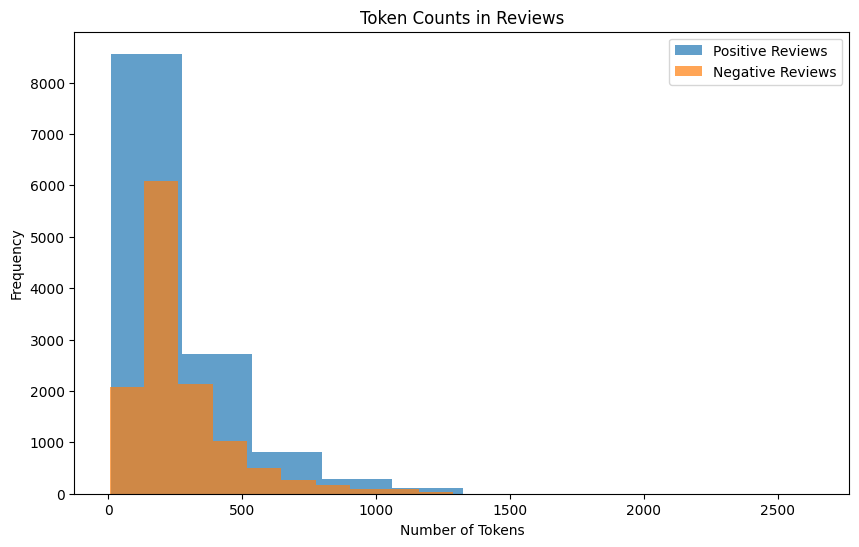

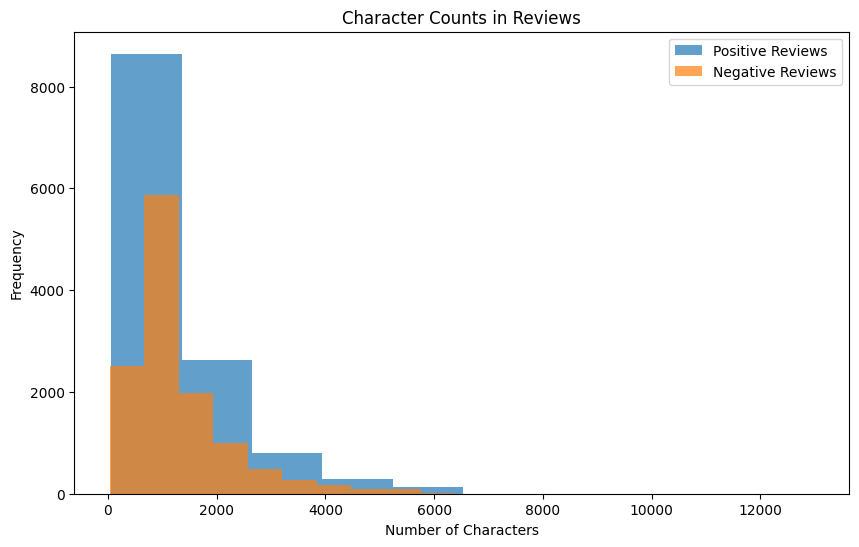

In [6]:
def plot_histogram(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.hist(data['pos'], alpha=0.7, label='Positive Reviews')
    plt.hist(data['neg'], alpha=0.7, label='Negative Reviews')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

plot_histogram(token_counts, "Token Counts in Reviews", "Number of Tokens", "Frequency")
plot_histogram(char_counts, "Character Counts in Reviews", "Number of Characters", "Frequency")

*** Discuss your results here (5 points)***

The lengths of positive and negative reviews are similarly distributed, both shows a right-skewed pattern. This suggests that most reviews are relatively short. The overlap between the distributions for positive and negative reviews indicates that the sentiment expressed does not significantly affect the length of the review although there is a slight difference between two class.

It also indicates that we should not heavily weigh the length of the text as an indicator of sentiment. Instead, the focus should be on qualitative factors such as word choice and context.

##### **Part 1.3.1 (20 points)**: Frequency Analysis 1

Build term frequency (raw counts) tables for two folders ("pos" and "neg"), separately. Specifically, please read in a single review at a time and for each review, do the following:

    1. Process the review by separating and lemmatizing the words;

    2. Remove the stop words;
    
    3. Count the number of times each lemma appears and add these to the frequency table. Note that you need to convert lemmas to lowercase and we use raw counts as the "frequency"--do not do any division. Also, as we explain below, we will only count lemmas that are alphabetic.

After looping through all reviews in a folder, you should have the term frequency table for the entire corpus (importantly, the frequency table should not just be for a single review; it should be for all reviews in the same folder). Sort the table and print the top 100 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

> Note: When counting the lemmas, include only those composed of alphabetic characters (a-z and A-Z). This can be accomplished using a regular expression.

In [7]:
# Write your code here
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def process_review(review):
    words = nltk.word_tokenize(review)
    lemmas = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]
    return lemmas

def build_freq_table(folder_path):
    freq_table = Counter()
    for file_name in tqdm(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8', errors = 'ignore') as file:
            content = file.read()
            lemmas = process_review(content)
            freq_table.update(lemmas)
    return freq_table

def print_top_100(freq_table):
    sorted_items = freq_table.most_common(100)
    for rank, (lemma, freq) in enumerate(sorted_items, start=1):
        print(f"{rank}. {lemma}: {freq}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
pos_freq_table = build_freq_table(folders[0])
neg_freq_table = build_freq_table(folders[1])

print("Top 100 lemmas in positive reviews:")
print_top_100(pos_freq_table)

print("\nTop 100 lemmas in negative reviews:")
print_top_100(neg_freq_table)

  0%|          | 0/12500 [00:00<?, ?it/s]

  0%|          | 0/12500 [00:00<?, ?it/s]

Top 100 lemmas in positive reviews:
1. br: 48719
2. film: 24181
3. movie: 21508
4. one: 13703
5. like: 8703
6. time: 7498
7. good: 7068
8. character: 6809
9. great: 6512
10. story: 6501
11. see: 6404
12. well: 5621
13. would: 5536
14. make: 5433
15. get: 5385
16. really: 5251
17. also: 5213
18. scene: 4913
19. show: 4681
20. even: 4630
21. love: 4558
22. life: 4473
23. much: 4449
24. first: 4349
25. people: 4233
26. way: 4196
27. best: 4117
28. many: 3845
29. think: 3756
30. year: 3537
31. could: 3496
32. thing: 3472
33. made: 3383
34. know: 3374
35. two: 3332
36. go: 3296
37. watch: 3292
38. seen: 3277
39. man: 3119
40. little: 3087
41. never: 3085
42. still: 3079
43. end: 2992
44. say: 2980
45. actor: 2956
46. take: 2867
47. performance: 2809
48. work: 2772
49. find: 2696
50. come: 2649
51. ever: 2639
52. lot: 2581
53. look: 2554
54. part: 2535
55. play: 2525
56. give: 2427
57. real: 2416
58. plot: 2384
59. role: 2378
60. back: 2356
61. acting: 2304
62. want: 2272
63. world: 2267
64.

##### **Part 1.3.2 (15 points)**: Frequency Analysis 2

Now we are now interested in understanding the difference in the most commonly used words between positive and negative reviews.

    1. First find the top 100 most commonly used words in positive and negative reviews, respectively. Create two separate lists of 100 words, each representing the most common words in their respective corpus.

    2. Then identify and print the words that are common in both lists and those that are exclusive to one of the lists;

    3. Based on your result, discuss whether the frequency analysis aids in determining positive/negative reviews and explain your reasoning.

In [9]:
# Write your code here (10 points)
pos_100_set = set([word for word, fre in pos_freq_table.most_common(100)])
neg_100_set = set([word for word, fre in neg_freq_table.most_common(100)])
common_words = pos_100_set.intersection(neg_100_set)

print('Common Words Count: ', len(common_words))
print('Common words: ')
for word in common_words:
  print(word)

Common Words Count:  76
Common words: 
best
think
however
love
though
find
make
like
thing
work
seen
thought
director
would
really
actor
bad
little
another
part
still
every
man
way
woman
back
show
real
know
something
could
better
old
guy
funny
say
many
even
come
plot
great
go
take
people
time
life
first
girl
give
made
end
want
story
br
get
movie
year
lot
also
one
much
look
film
scene
well
ever
acting
see
watching
never
going
two
play
character
good
watch


In [10]:
pos_only_words = pos_100_set - common_words

print('Positive Only Words Count: ', len(pos_only_words))
print('Positive Only words: ')
for word in pos_only_words:
  print(word)

Positive Only Words Count:  24
Positive Only words: 
comedy
friend
war
performance
u
role
must
saw
day
young
may
new
quite
series
family
dvd
music
always
feel
world
fan
bit
right
cast


In [11]:
neg_only_words = neg_100_set - common_words

print('Negative Only Words Count: ', len(neg_only_words))
print('Negative Only words: ')
for word in neg_only_words:
  print(word)

Negative Only Words Count:  24
Negative Only words: 
enough
horror
script
reason
around
worst
seems
ca
anything
fact
nothing
effect
got
big
point
minute
try
whole
line
actually
pretty
might
least
original


*** Discuss your results here (5 points) ***


Frequency analysis does highlight some words unique to positive or negative sentiments, like "beautiful" appearing only in positive reviews and "worst" in negative ones. Yet, the large number of words common to both suggests that context matters a lot; just counting words won't tell you the whole story about how people feel. While this approach gives us some information about mood in reviews, it's not a good method for sentiment detection.

##### **Part 1.4 (20 points)**: Co-occurrence Analysis

Calculate the Pointwise Mutual Information (PMI) value between "film" and "wonderful" in the "pos" and "neg" folder, respectively.

Hint 1: As in lecture, when computing PMI, we will compute probabilities by counting the number of documents where words occur or co-occur.  For example, $P('word') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'word'}{number \ \ of \ \ documents}$.  

Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

In [12]:
# Write your code here
def process_files(folder_path, word1, word2):
    word1_count = 0
    word2_count = 0
    cooccur_count = 0
    total_docs = 0
    label = os.path.basename(folder_path)
    print('evaluating', label, 'files...' )
    files = os.listdir(folder_path)
    for file in tqdm(files):
        file_path = os.path.join(folder_path, file)
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
            content = f.read().lower()
            total_docs += 1
            if word1 in content:
                word1_count += 1
            if word2 in content:
                word2_count += 1
            if word1 in content and word2 in content:
                cooccur_count += 1
    p_word1       = word1_count / total_docs
    p_word2       = word2_count / total_docs
    p_word1_word2 = cooccur_count / total_docs
    return p_word1, p_word2, p_word1_word2

def pmi(p_w1, p_w2, p_w1_w2):
    if p_w1_w2 > 0:
      pmi = math.log2(p_w1_w2 / (p_w1 * p_w2))
    else:
      pmi = float('-inf')
    return pmi

**Positive:**

In [13]:
p_film_pos, p_wonderful_pos, p_join_pos =  process_files(folders[0], 'film', 'wonderful')
print(p_film_pos, p_wonderful_pos, p_join_pos)

evaluating pos files...


  0%|          | 0/12500 [00:00<?, ?it/s]

0.60584 0.102 0.07112


In [14]:
pos_pmi = pmi(p_film_pos, p_wonderful_pos, p_join_pos)
print('Pointwise Mutual Information (PMI) value between "film" and "wonderful" in the "pos":', pos_pmi)

Pointwise Mutual Information (PMI) value between "film" and "wonderful" in the "pos": 0.20274933814838475


**Negative:**

In [15]:
p_film_neg, p_wonderful_neg, p_join_neg =  process_files(folders[1], 'film', 'wonderful')
print(p_film_neg, p_wonderful_neg, p_join_neg)

evaluating neg files...


  0%|          | 0/12500 [00:00<?, ?it/s]

0.59288 0.02232 0.0148


In [16]:
neg_pmi = pmi(p_film_neg, p_wonderful_neg, p_join_neg)
print('Pointwise Mutual Information (PMI) value between "film" and "wonderful" in the "neg":', neg_pmi)

Pointwise Mutual Information (PMI) value between "film" and "wonderful" in the "neg": 0.16144811337988965


### **Part 2 (20 points)**: Entity Recognition

Let's practice using Spacy to extract named entities from the text data.

##### **Part 2.1 (20 points)**: Entity Frequency Analysis

Calculate the frequency of each entity in both "positive" and "negative" reviews. Create a bar chart for each review type, with the horizontal axis representing entity labels and the vertical axis representing their frequency. Arrange the labels in descending order of their frequency.

In [17]:
# Write your code here
nlp = spacy.load("en_core_web_sm")
def entity_frequency(folder_path):
    entity_freq = Counter()

    for file_name in tqdm(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            content = file.read()
            doc = nlp(content)
            entities = [ent.label_ for ent in doc.ents]
            entity_freq.update(entities)

    return entity_freq

def plot_entity_freq(entity_freq, title):
    entities_sorted = entity_freq.most_common()
    labels, values = zip(*entities_sorted)
    plt.figure(figsize=(10, 8))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('Entity Labels')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

  0%|          | 0/12500 [00:00<?, ?it/s]

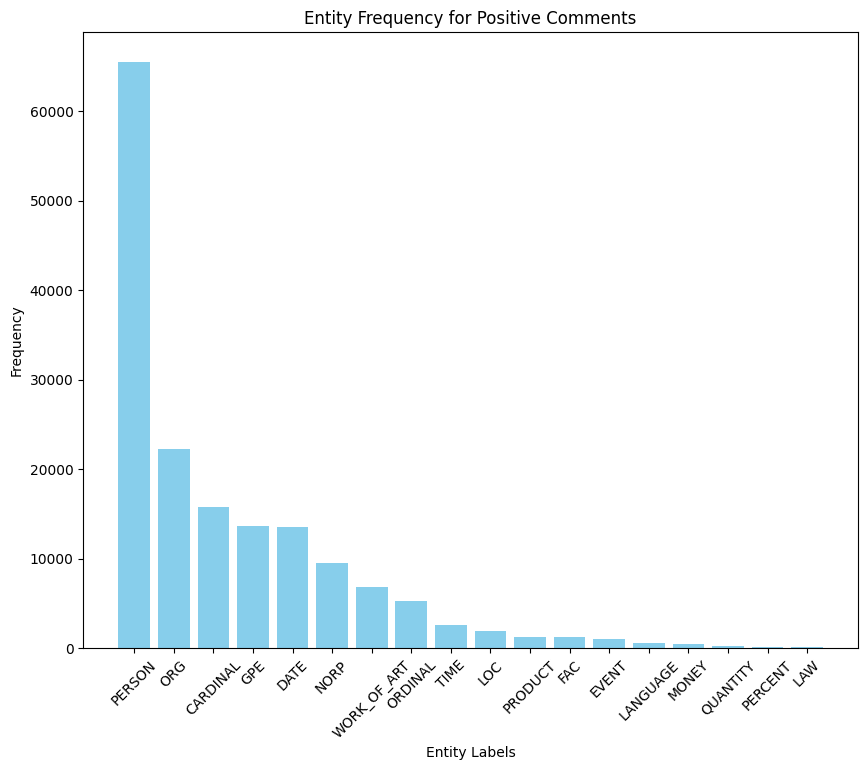

In [18]:
entity_freq_pos = entity_frequency(folders[0])
plot_entity_freq(entity_freq_pos, 'Entity Frequency for Positive Comments')

  0%|          | 0/12500 [00:00<?, ?it/s]

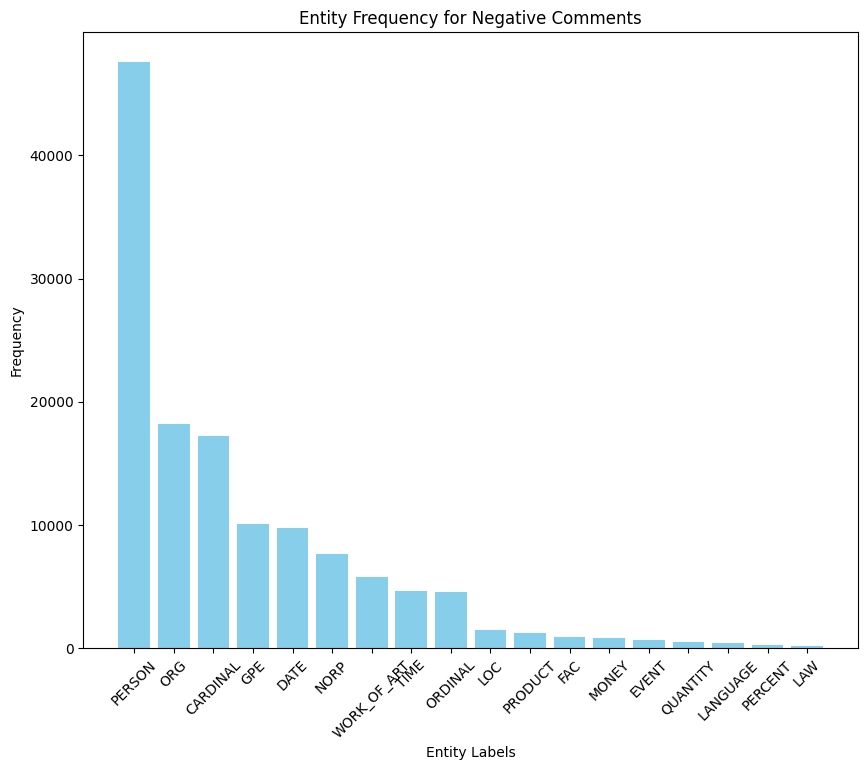

In [19]:
entity_freq_neg = entity_frequency(folders[1])
plot_entity_freq(entity_freq_neg, 'Entity Frequency for Negative Comments')